## Exploration of COVID-19 cases in Ontario during the period of Delta dominance ##
### About ###
Even though it is not currently the most important variant of concern, SARS-CoV-2 B.1.617.2, better known as Delta variant, is of particular interest given key [factors][1] such as increased virulence (transmissibility), hospitalization rates 60% higher than the wild type, greater levels of viral loads, and reduced response to the vaccines.

[1]: <http://www.nature.com/articles/d41586-021-01696-3> "Callaway E. Delta coronavirus variant: scientists brace for impact. Nature [Internet] 2021 Jul 1;595(7865):17–8."

Technically, assessment of genotyped data positive for Delta variant is the best way to make proper inferences. However, it is possible to make valid inferences by analyzing historical data belonging to the the cases that arised during the Delta dominance period, which the general epidemiological consensus has defined between July 4, 2021 and December 4, 2021. One of such data sources is the *Confirmed positive cases of COVID-19 in Ontario* dataset that the [Government of Ontario][2] has made publicly available.

[2]: <https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario> "Ontario Data Catalogue - Confirmed positive cases of COVID-19 in Ontario"

### Code ###
First, the required basic libraries will be installed:

In [2]:
!pip install bs4
!pip install selenium
!pip install pandas
!pip install html5lib
!pip install matplotlib
!pip install scikit-learn
!pip install lxml

  Obtaining dependency information for bs4 from https://files.pythonhosted.org/packages/51/bb/bf7aab772a159614954d84aa832c129624ba6c32faa559dfb200a534e50b/bs4-0.0.2-py2.py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/97/e3/fd7272d6d2c49fd49a79a603cb28c8b5a71f8911861b4a0409b3c006a241/selenium-4.17.2-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/14/fb/9299cf74953f473a15accfdbe2c15218e766bae8c796f2567c83bae03e98/trio-0.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Using cached trio_websocket-0.11.1-py3-none-any.whl.metadata (4.7 kB)
  Obtaining dependency information for typing_extensions>=4.9.0 from https://files.pythonhosted.org/packages/b7/f4/6a90020cd2d93349b442bfcb657d0dc91eee65491600b2cb1d388bc98e6b/typing_extensions-4.9.0-py3-none-any.whl.metadata
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Obtaining de


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/87/03/fe50521919aa981f6a1c197037da4623a267b0e5f42246d69ba048e86da3/pandas-2.2.0-cp312-cp312-win_amd64.whl.metadata
  Using cached pandas-2.2.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for numpy<2,>=1.26.0 from https://files.pythonhosted.org/packages/16/2e/86f24451c2d530c88daf997cb8d6ac622c1d40d19f5a031ed68a4b73a374/numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/112.2 kB ? eta -:--:--
     ---------- -------------------------- 30.7/112.2 kB 259.2 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/112.2 kB 409.6 kB/s eta 0:00:01
     ------------------------------------ 112.2/112.2 kB 649.3 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/af/ea/c34d5ef3a31970d2c8474290aed3a9fc91a308850885f3f7f8e7d3c76754/fonttools-4.48.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.2 kB ? eta -:--:--
     ------- ----------------------------- 30.7/162.2 kB 660.6 kB/s e


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f6/28/b569523552a11b49dc4d33952f43dedb23792fe8ce2f2151d070d615861a/scikit_learn-1.4.0-1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/f3/31/91a2a3c5eb85d2bfa86d7c98f2df5d77dcdefb3d80ca9f9037ad04393acf/scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/02/59/e1fbe2514d8ab39977b72e77f98d0fa49772f61e938049baf151b307a4f0/lxml-5.1.0-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB 435.7 kB/s eta 0:00:09
    --------------------------------------- 0.1/3.9 MB 653.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.3/3.9 MB 1.7 MB/s eta 0:00:03
   ---- ----------------------------------- 0.5/3.9 MB 2.4 MB/s eta 0:00:02
   ------ --------------------------------- 0.7/3.9 MB 2.8 MB/s eta 0:00:02
   --------- ------------------------------ 0.9/3.9 MB 3.0 MB/s eta 0:00:02
   --------- ------------------------------ 0.9/3.9 MB 3.0 MB/s eta 0:00:02
   ---------- ----------------------------- 1.0/3.9 MB 2.8 MB/s eta 0:00:02
   --------------- ------------------------ 1.5/


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Now, the data source will be found, downloaded and stored as a CSV file:

In [39]:
import requests

In [9]:
url = "https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv"
filename = 'conposcovidloc.csv'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)

In [10]:
with open(filename, mode="wb") as file:
    file.write(response.content)

The PANDAS library will be used for data manipulation and analysis purposes (it was previously installed):

In [3]:
import pandas as pd
filename = 'conposcovidloc.csv'
all_cases = pd.read_csv(filename)

C:\Users\Pallid_Mask\AppData\Local\Temp\ipykernel_18120\3984988226.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Let's have a general look to the loaded data:

In [4]:
all_cases.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome1,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,1934-09-28,2022-09-29,2022-09-29,2022-09-27,<20,FEMALE,NaN,2262,Thunder Bay District Health Unit,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
1,2,1989-02-21,2022-11-08,2022-11-07,2022-11-06,<20,FEMALE,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
2,3,2000-03-01,2022-01-30,NaN,2000-03-01,<20,FEMALE,NaN,2243,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833
3,4,2002-07-06,2022-07-06,2022-07-07,2002-07-06,20s,FEMALE,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
4,5,2002-08-08,2022-08-15,2022-08-15,2022-08-14,60s,MALE,NaN,2233,Grey Bruce Health Unit,101 17th Street East,Owen Sound,N4K 0A5,www.publichealthgreybruce.on.ca/,44.576196,-80.940980


It is good to know the number of observations present in the dataframe:

In [54]:
len(all_cases)

1705858

The actual structure of the dataframe should be known too:

In [55]:
all_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705858 entries, 0 to 1705857
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Row_ID                     int64  
 1   Accurate_Episode_Date      object 
 2   Case_Reported_Date         object 
 3   Test_Reported_Date         object 
 4   Specimen_Date              object 
 5   Age_Group                  object 
 6   Client_Gender              object 
 7   Outcome1                   object 
 8   Reporting_PHU_ID           int64  
 9   Reporting_PHU              object 
 10  Reporting_PHU_Address      object 
 11  Reporting_PHU_City         object 
 12  Reporting_PHU_Postal_Code  object 
 13  Reporting_PHU_Website      object 
 14  Reporting_PHU_Latitude     float64
 15  Reporting_PHU_Longitude    float64
dtypes: float64(2), int64(2), object(12)
memory usage: 208.2+ MB


**Restrict data to given period of interest** 
Omicron introduction and dominance, as per general epidemiological consensus based on case load)

**Restrict data to given period of interest** 
</br>
We want the information with *Accurate_Episode_Date* between July 4, 2021 and December 4, 2021 (Delta dominance, as explained at the beginning of this notebook).

In [64]:
#Delta wave: Jul. 4, 2021 - Dec. 4, 2021

import pandas as pd

all_cases['DT_Episode_Date'] = pd.to_datetime(all_cases['Accurate_Episode_Date'])  # Convert to datetime and store in DT_Episode_Date
all_cases.set_index('DT_Episode_Date', inplace=True)  # Set DT_Episode_Date column as index

start_date = '2021-07-04'
end_date = '2021-12-04'

delta = all_cases.loc[start_date:end_date]
delta.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome1,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
DT_Episode_Date,,,,,,,,,,,,,,,,
2021-07-04,547021,2021-07-04,2021-07-04,2021-07-04,2021-07-04,20s,FEMALE,NaN,2255,Peterborough Public Health,185 King Street,Peterborough,K9J 2R8,www.peterboroughpublichealth.ca,44.301632,-78.321347
2021-07-04,547022,2021-07-04,2021-07-04,2021-07-04,2021-07-04,20s,FEMALE,NaN,2265,"Region of Waterloo, Public Health",99 Regina Street South,Waterloo,N2J 4V3,www.regionofwaterloo.ca,43.462876,-80.520913
2021-07-04,547023,2021-07-04,2021-07-04,2021-07-04,2021-07-04,20s,FEMALE,NaN,2237,Hamilton Public Health Services,"110 King St. West, 2nd Floor",Hamilton,L8P 4S6,www.hamilton.ca/publichealth,43.257631,-79.871341
2021-07-04,547024,2021-07-04,2021-07-04,2021-07-04,2021-07-04,20s,FEMALE,NaN,2237,Hamilton Public Health Services,"110 King St. West, 2nd Floor",Hamilton,L8P 4S6,www.hamilton.ca/publichealth,43.257631,-79.871341
2021-07-04,547025,2021-07-04,2021-07-04,2021-07-04,2021-07-04,20s,FEMALE,NaN,2237,Hamilton Public Health Services,"110 King St. West, 2nd Floor",Hamilton,L8P 4S6,www.hamilton.ca/publichealth,43.257631,-79.871341


Check number of observations in dataframe of interest (always good to know):

In [65]:
len(delta)

81553

Let's see the number and proportion of cases of cases according to geographic area (Public Health Units):

In [66]:
delta['Reporting_PHU'].value_counts()

Reporting_PHU
Toronto Public Health                                       14122
Peel Public Health                                           8139
York Region Public Health Services                           6643
Windsor-Essex County Health Unit                             5666
Ottawa Public Health                                         4876
Hamilton Public Health Services                              4737
Simcoe Muskoka District Health Unit                          4134
Region of Waterloo, Public Health                            3421
Durham Region Health Department                              3188
Niagara Region Public Health Department                      2883
Halton Region Health Department                              2648
Middlesex-London Health Unit                                 2602
Sudbury & District Health Unit                               1994
Southwestern Public Health                                   1731
Wellington-Dufferin-Guelph Public Health                     1

In [67]:
delta['Reporting_PHU'].value_counts(normalize=True)

Reporting_PHU
Toronto Public Health                                       0.173163
Peel Public Health                                          0.099800
York Region Public Health Services                          0.081456
Windsor-Essex County Health Unit                            0.069476
Ottawa Public Health                                        0.059789
Hamilton Public Health Services                             0.058085
Simcoe Muskoka District Health Unit                         0.050691
Region of Waterloo, Public Health                           0.041948
Durham Region Health Department                             0.039091
Niagara Region Public Health Department                     0.035351
Halton Region Health Department                             0.032470
Middlesex-London Health Unit                                0.031906
Sudbury & District Health Unit                              0.024450
Southwestern Public Health                                  0.021225
Wellington-Dufferin-

As pert these results, most cases (14,122; 17.3%) were identified in the Toronto Public Health Unit, which is not a surprise, given that we are dealing with an infectious disease, and that Toronto is the most populated PHU in Ontario (so no big surprises so far).
</br></br>
Now let's see the number of cases during the Delta dominance period according to age group:

In [68]:
delta['Age_Group'].value_counts()

Age_Group
<20        22887
20s        15135
30s        14072
40s        10947
50s         8152
60s         5805
70s         2871
80s         1238
90+          435
UNKNOWN       11
Name: count, dtype: int64

Given that we are interested in known age groups, and that the number of unknown observations is insignificant (compared to the 'known' age groups), the observations with unknown age group are then dropped:

In [77]:
delta = delta[delta['Age_Group'] != 'UNKNOWN']
delta['Age_Group'].value_counts()

Age_Group
<20    22887
20s    15135
30s    14072
40s    10947
50s     8152
60s     5805
70s     2871
80s     1238
90+      435
Name: count, dtype: int64

Now, let's check how was the progression of cases (in terms of proportions), according to month:

In [78]:
delta['Accurate_Episode_Date'] = pd.to_datetime(delta['Accurate_Episode_Date'])
delta['Month'] = delta['Accurate_Episode_Date'].dt.month

#cases_per_month = delta.groupby('Month').size()
#average_cases_per_month = cases_per_month.mean()
#print("The average number of cases per month is:", average_cases_per_month)

delta['Month'].value_counts().sort_index()

Month
7      4902
8     18043
9     19760
10    12655
11    21581
12     4601
Name: count, dtype: int64

Let's see the numbers above in terms of proportions:

In [79]:
delta['Month'].value_counts(normalize=True).sort_index()

Month
7     0.060116
8     0.221272
9     0.242329
10    0.155196
11    0.264661
12    0.056425
Name: proportion, dtype: float64

As per the results above, we know that most cases took place in the youngest age group (<20 years), and that most cases (21,581; 26.4%) took place during the month of November. However, it would be intersting to see how was the progression of the pandemic, both in terms of age group and over time .
</br></br>
For that purpose, the data is further manipulated (agreggated) so that meaningful plots can be rendered:

In [85]:
clump = delta.groupby(['Accurate_Episode_Date'])['Row_ID'].count().to_frame().reset_index()
clump['Accurate_Episode_Date'] = pd.to_datetime(clump['Accurate_Episode_Date'])
clump.head()

,Accurate_Episode_Date,Row_ID
0,2021-07-04,163
1,2021-07-05,200
2,2021-07-06,166
3,2021-07-07,167
4,2021-07-08,128


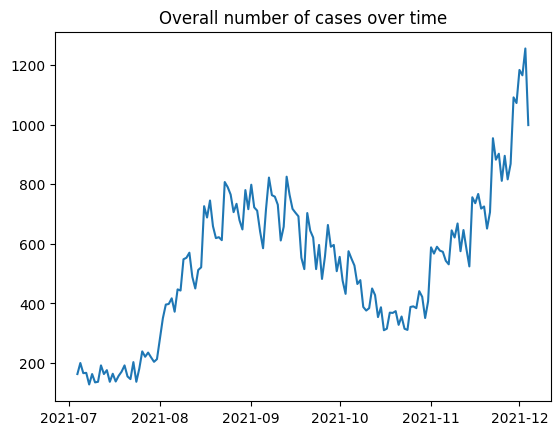

In [88]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig = plt.figure()
ax = plt.axes()

x = clump['Accurate_Episode_Date']
y = clump['Row_ID']
ax.plot(x, y)

# Ticks for every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("Overall number of cases over time");

Now, let's decompose the plot above into (combined) plots according to age group:

In [89]:
clump = delta.groupby(['Accurate_Episode_Date', 'Age_Group'])['Row_ID'].count().to_frame().reset_index()
clump['Accurate_Episode_Date'] = pd.to_datetime(clump['Accurate_Episode_Date'])
clump.tail()

,Accurate_Episode_Date,Age_Group,Row_ID
1356,2021-12-04,60s,86
1357,2021-12-04,70s,35
1358,2021-12-04,80s,16
1359,2021-12-04,90+,2
1360,2021-12-04,<20,304


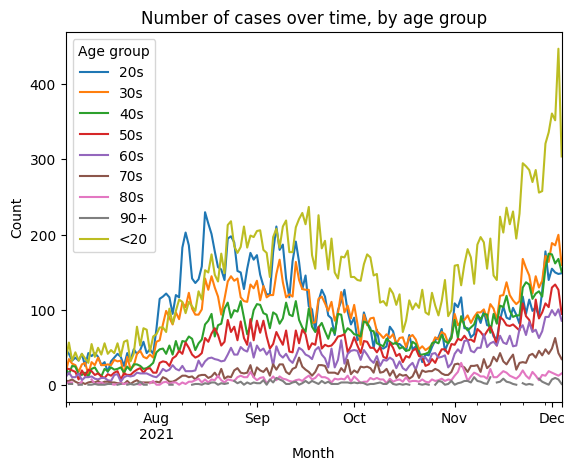

In [90]:
# Set 'Accurate_Episode_Date' as the index
clump.set_index('Accurate_Episode_Date', inplace=True)

# Reshape the data using pivot_table
pivot_data = clump.pivot_table(index='Accurate_Episode_Date', columns='Age_Group', values='Row_ID')

# Plot the time series with separate lines for each 'Age_Group'
pivot_data.plot()

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of cases over time, by age group')
plt.legend(title='Age group')

# Show the plot
plt.show()

## Conclusions ##

* It is not surprising to see that most cases during the Delta dominance period arised in the most densely populated PHU (Toronto).
* Technically, most COVID-19 positive individuals were identified during the month of November. However, the distribution patterns by age group tend to differ.
* The important spike seen at the end of the evaluated period was generated by cases belonging to the youngest age group; this group also had the most variation over time. In contrast, the observed number of COVID-19 positive individuals from the oldest age group remained steady throughout the assessed period.  